In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

sns.set_theme(style="darkgrid")

pca = PCA(n_components=2)

In [96]:
# Loading the data
tb_existing_file = "data/tb_existing_100k.csv"

existing_df = pd.read_csv(tb_existing_file, index_col=0, thousands=",")
existing_df.index.names = ["country"]
existing_df.columns.names = ["year"]

# PCA

In [97]:
# Each country is represented by 18 variables (years). We do a Principal Component Analysis on this dataset
existing_2d = pca.fit_transform(existing_df)

existing_2d_df = pd.DataFrame(existing_2d)
existing_2d_df.index = existing_df.index
existing_2d_df.columns = ["PC1", "PC2"]
existing_2d_df.head()

,PC1,PC2
country,,
Afghanistan,732.215864,203.381494
Albania,-613.296510,4.715978
Algeria,-569.303713,-36.837051
American Samoa,-717.082766,5.464696
Andorra,-661.802241,11.037736


In [98]:
# How much of the variance is accounted for by the two dimensions?
pca.explained_variance_ratio_

array([0.91808789, 0.060556  ])

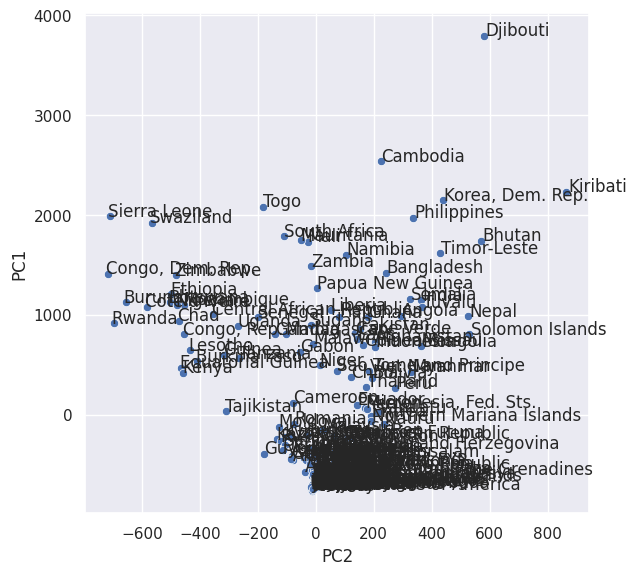

In [99]:
# Let's now plot this
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.scatterplot(data=existing_2d_df, x="PC2", y="PC1")
for country in existing_2d_df.index:
    p1.text(
        existing_2d_df.loc[country]["PC2"] * 1.01,
        existing_2d_df.loc[country]["PC1"],
        country,
    )

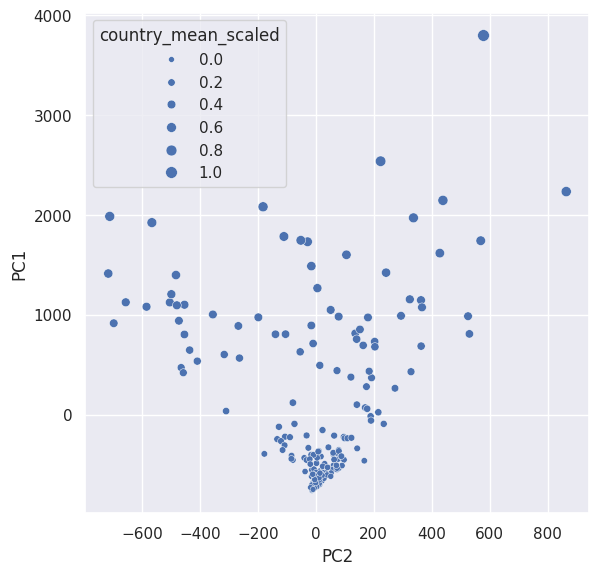

In [100]:
# Now we add the mean of the country over all the years
existing_2d_df["country_mean"] = pd.Series(
    existing_df.mean(axis=1), index=existing_df.index
)
country_mean_max = existing_2d_df.T.loc["country_mean"].max()
country_mean_min = existing_2d_df.T.loc["country_mean"].min()
country_mean_scaled = (existing_2d_df.T.loc["country_mean"] - country_mean_min) / (
    country_mean_max - country_mean_min
)
existing_2d_df["country_mean_scaled"] = pd.Series(
    country_mean_scaled, index=existing_df.index
)
existing_2d_df.head()

# Let's now plot this
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.scatterplot(data=existing_2d_df, x="PC2", y="PC1", size="country_mean_scaled")

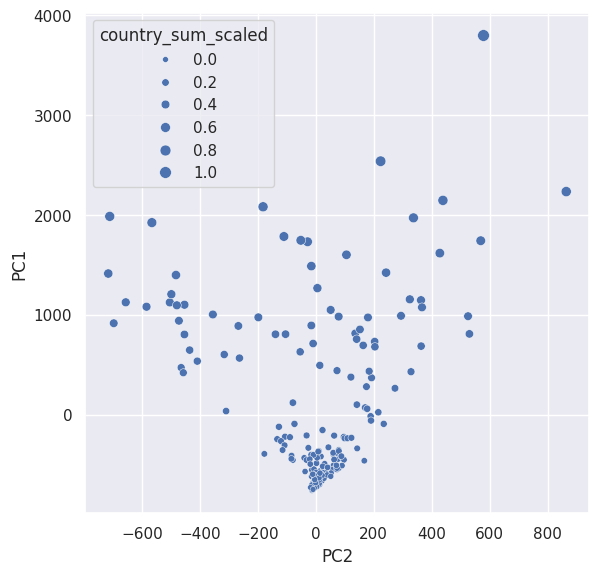

In [101]:
# Same thing but with a sum instead of a mean
existing_2d_df["country_sum"] = pd.Series(
    existing_df.sum(axis=1), index=existing_df.index
)
country_sum_max = existing_2d_df.T.loc["country_sum"].max()
country_sum_min = existing_2d_df.T.loc["country_sum"].min()
country_sum_scaled = (existing_2d_df.T.loc["country_sum"] - country_sum_min) / (
    country_sum_max - country_sum_min
)
existing_2d_df["country_sum_scaled"] = pd.Series(
    country_sum_scaled, index=existing_df.index
)
existing_2d_df.head()

# Let's now plot this
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.scatterplot(data=existing_2d_df, x="PC2", y="PC1", size="country_sum_scaled")

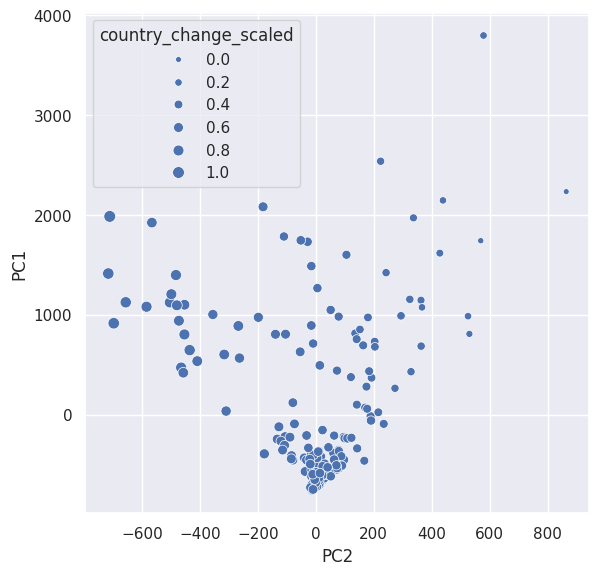

In [102]:
# Same thing with the change from 1990 till 2007
existing_2d_df["country_change"] = pd.Series(
    existing_df.T.loc["2007"] - existing_df.T.loc["1990"], index=existing_df.index
)
country_change_max = existing_2d_df.T.loc["country_change"].max()
country_change_min = existing_2d_df.T.loc["country_change"].min()
country_change_scaled = (
    existing_2d_df.T.loc["country_change"] - country_change_min
) / (country_change_max - country_change_min)
existing_2d_df["country_change_scaled"] = pd.Series(
    country_change_scaled, index=existing_df.index
)
existing_2d_df.head()

# Let's now plot this
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.scatterplot(
    data=existing_2d_df, x="PC2", y="PC1", size="country_change_scaled"
)

The results of the three plots show that the axis PC1 is more sensitive to changes in mean and total number of cases (time independent). The second axis PC2 on the other hand, depends more strongly on time variation of the number of cases (time dependent).

# K-means clustering

In [103]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(existing_df)
existing_2d_df["cluster"] = pd.Series(clusters.labels_, index=existing_2d_df.index)

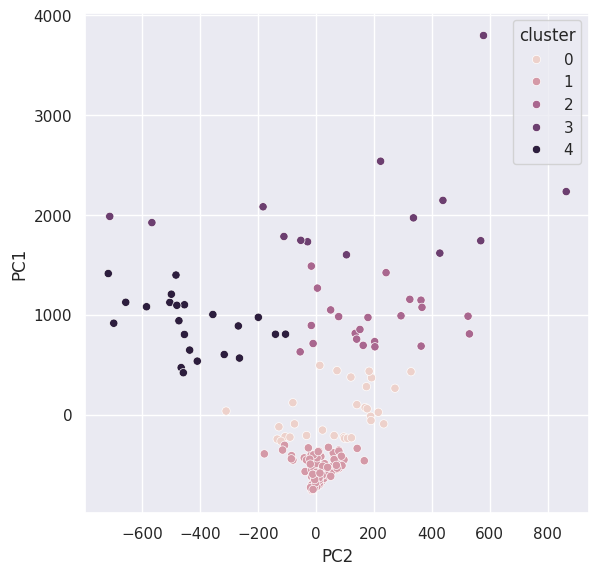

In [104]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.scatterplot(data=existing_2d_df, x="PC2", y="PC1", hue="cluster")

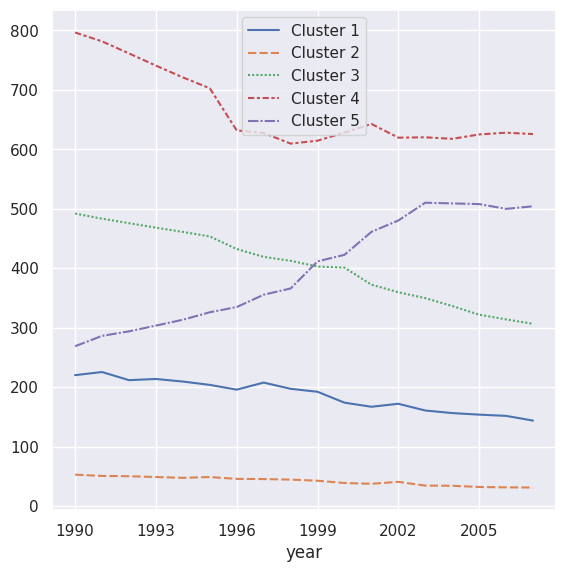

In [105]:
# We can see the time evolution of the cluster center
clusters_center_df = pd.DataFrame(
    clusters.cluster_centers_.T, index=existing_df.T.index
)
clusters_center_df.columns = [f"Cluster {i}" for i in range(1, 6)]
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.lineplot(data=clusters_center_df)
p1.set_xticks(np.arange(0, len(clusters_center_df.index), 3))

In [117]:
# What countries are in which cluster?
for i in range(5):
    idx = list(existing_2d_df.loc[existing_2d_df["cluster"] == i].index)
    print(len(idx), idx)

30 ['Benin', 'Bolivia', 'Cameroon', 'China', 'Comoros', 'Dominican Republic', 'Ecuador', 'Eritrea', 'Kazakhstan', 'Kyrgyzstan', 'Malaysia', 'Micronesia, Fed. Sts.', 'Myanmar', 'Nauru', 'Niger', 'Northern Mariana Islands', 'Palau', 'Peru', 'Korea, Rep.', 'Moldova', 'Romania', 'Russian Federation', 'Sao Tome and Principe', 'Tajikistan', 'Thailand', 'Uzbekistan', 'Vanuatu', 'Viet Nam', 'Wallis et Futuna', 'Yemen']
119 ['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Canada', 'Cayman Islands', 'Chile', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Georgia', 'Germany', 'Gree

In [161]:
# The cluster number 2 is too big, let's try to re-cluster it
kmeans_second = KMeans(n_clusters=2)
index_cluster_1 = existing_2d_df.loc[existing_2d_df["cluster"] == 1].index
clusters_second = kmeans_second.fit(existing_df.loc[index_cluster_1])

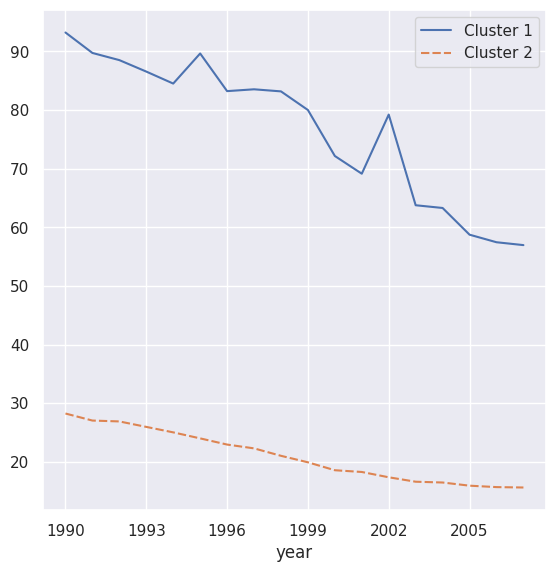

In [169]:
# We can see the time evolution of the cluster center
clusters_second_center_df = pd.DataFrame(
    clusters_second.cluster_centers_.T, index=existing_df.T.index
)
clusters_second_center_df.columns = [f"Cluster {i}" for i in range(1, 3)]
f, ax = plt.subplots(figsize=(6.5, 6.5))
p1 = sns.lineplot(data=clusters_second_center_df)
p1.set_xticks(np.arange(0, len(clusters_second_center_df.index), 3))

<Axes: >

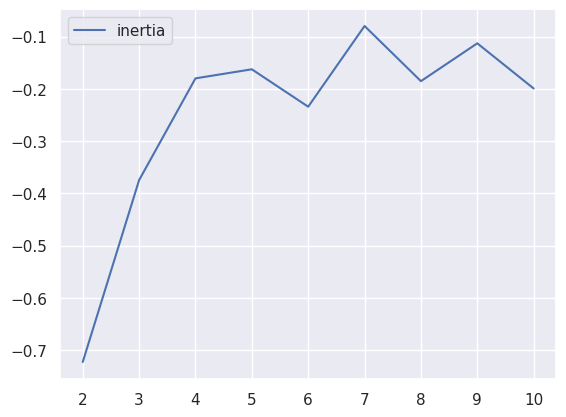

In [185]:
# Let us now test the inertia method
def get_inertia(n):
    kmeans = KMeans(n_clusters=n, random_state=1234)
    clusters = kmeans.fit(existing_df)
    return clusters.inertia_


inertias = [get_inertia(n) for n in range(1, 11)]
inertias_df = pd.DataFrame(inertias, index=pd.Series(np.arange(1, 11)))
inertias_df.columns = ["inertia"]
sns.lineplot(data=inertias_df.pct_change())

# We see the change in inertia when increasing the number of clusters slows down at n >= 4